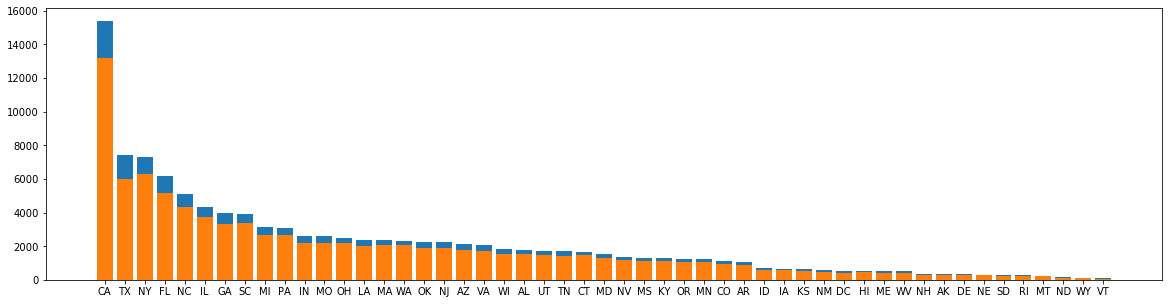

   school_state  project_is_approved  total       avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


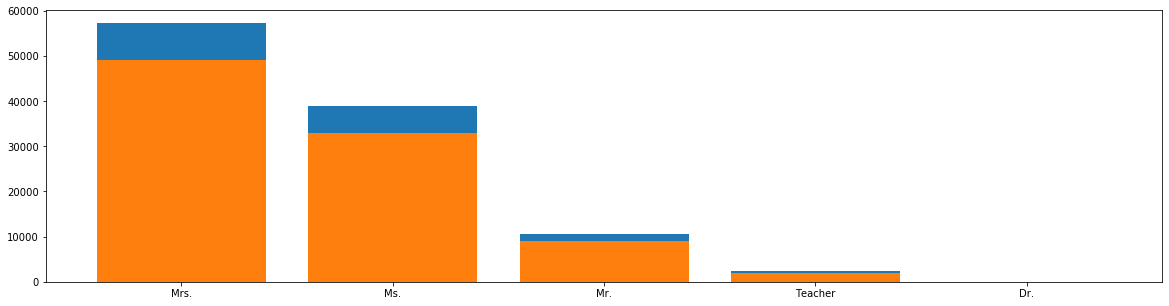

  teacher_prefix  project_is_approved  total       avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def stack_plots(data,col1,col2,col3):
    plt.figure(figsize=(20,5))
    plt.bar(data[col1],data[col3])
    plt.bar(data[col1],data[col2])
    plt.show()

def univariate_analysis(data,col1,col2):
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()
    temp ["total"] = pd.DataFrame(data.groupby(col1)[col2].count()).reset_index()["project_is_approved"]
    temp ["avg"] = pd.DataFrame(data.groupby(col1)[col2].mean()).reset_index()["project_is_approved"]
    temp.sort_values("total",ascending=False,inplace=True)
    stack_plots(temp,col1,col2,"total")
    print(temp.head(5))
    print(temp.tail(5))

project_Data=pd.read_csv("C:\\Users\\ACER\\Desktop\\machine learning\\Assignment\\NB\\train_data.csv")
#print(project_Data.columns)
univariate_analysis(project_Data,"school_state","project_is_approved")
univariate_analysis(project_Data,"teacher_prefix","project_is_approved")

In [8]:
project_categories = list(project_Data['project_subject_categories'].values)

cat_list = []

for i in project_categories:
    temp=""
    for j in i.split(","):
        if "The" in j.split():
            j = j.replace("The","")
        j = j.replace(" ","")
        temp+=j.strip()+" "
    temp = temp.replace("&","_")
    cat_list.append(temp.strip())

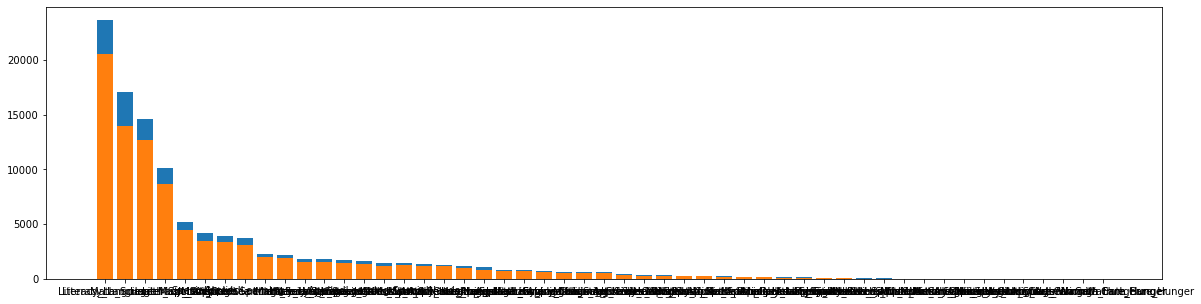

                  clean_categories  project_is_approved  total       avg
24               Literacy_Language                20520  23655  0.867470
32                    Math_Science                13991  17072  0.819529
28  Literacy_Language Math_Science                12725  14636  0.869432
8                    Health_Sports                 8640  10177  0.848973
40                      Music_Arts                 4429   5180  0.855019
                        clean_categories  project_is_approved  total       avg
41            Music_Arts AppliedLearning                    7     10  0.700000
7     AppliedLearning Warmth Care_Hunger                    8     10  0.800000
31  Literacy_Language Warmth Care_Hunger                    7      9  0.777778
45         Music_Arts Warmth Care_Hunger                    1      2  0.500000
23     History_Civics Warmth Care_Hunger                    0      1  0.000000


In [9]:
project_Data["clean_categories"]=cat_list
project_Data.drop("project_subject_categories",axis=1,inplace=True)
univariate_analysis(project_Data,"clean_categories","project_is_approved")

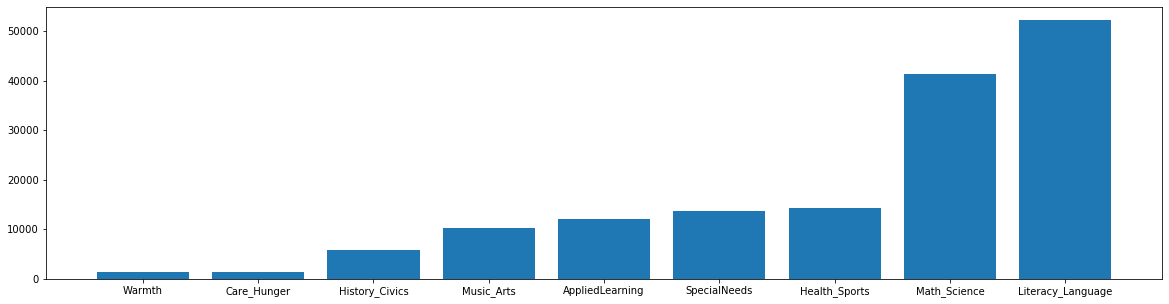

In [14]:
from collections import Counter
my_counter = Counter()
for i in project_Data["clean_categories"].values:
    my_counter.update(i.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(),key=lambda kv:kv[1]))

plt.figure(figsize=(20,5))
plt.bar(sorted_cat_dict.keys(),sorted_cat_dict.values())
plt.show()


In [17]:
for i, j in sorted_cat_dict.items():
    print("{:20}:{:10}".format(i,j))

Warmth              :      1388
Care_Hunger         :      1388
History_Civics      :      5914
Music_Arts          :     10293
AppliedLearning     :     12135
SpecialNeeds        :     13642
Health_Sports       :     14223
Math_Science        :     41421
Literacy_Language   :     52239


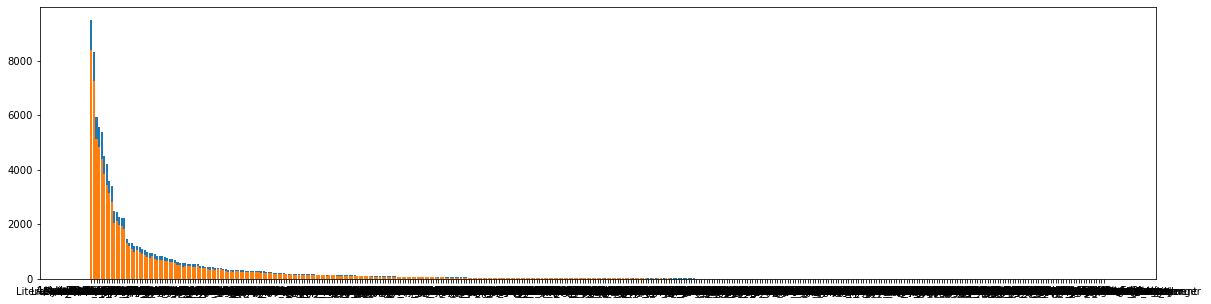

                 clean_subcategories  project_is_approved  total       avg
317                        Literacy                  8371   9486  0.882458
319            Literacy Mathematics                  7260   8325  0.872072
331  Literature_Writing Mathematics                  5140   5923  0.867803
318     Literacy Literature_Writing                  4823   5571  0.865733
342                     Mathematics                  4385   5379  0.815207
                       clean_subcategories  project_is_approved  total  avg
210     Extracurricular FinancialLiteracy                     1      1  1.0
183          Economics NutritionEducation                     1      1  1.0
316  History_Geography Warmth Care_Hunger                     0      1  0.0
73    Civics_Government ParentInvolvement                     1      1  1.0
375              Other Warmth Care_Hunger                     1      1  1.0


In [27]:
project_subcategories = list(project_Data["project_subject_subcategories"].values)

subcat_list = []

for i in project_subcategories:
        temp =""
        
        for j in i.split(","):
            j = j.replace(" ","")
            if "The" in j.split():
                j = j.replace("The","")
            temp += j.strip()+" "
        temp = temp.replace("&","_")
        subcat_list.append(temp)

project_Data["clean_subcategories"] = subcat_list
project_Data.drop("project_subject_subcategories",axis=1,inplace=True)
univariate_analysis(project_Data,"clean_subcategories","project_is_approved")



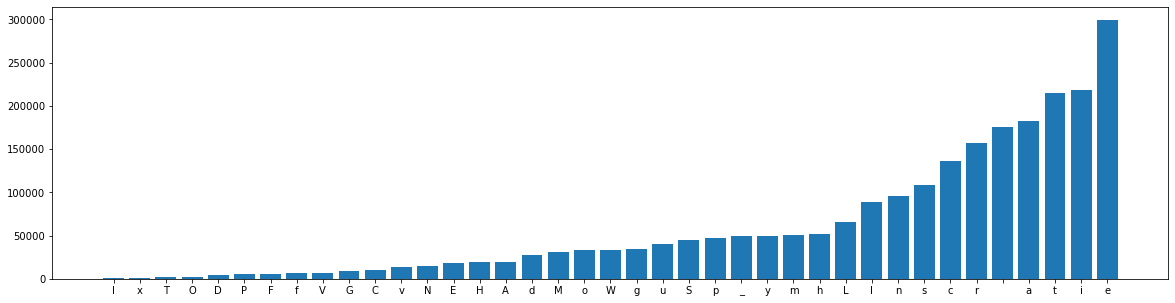

In [29]:
my_count = Counter()
for i in project_Data["clean_subcategories"].values:
    my_count.update(i)

subcat_dict = dict(my_count)
sorted_subcat_dict = dict(sorted(subcat_dict.items(),key=lambda kv:kv[1]))

plt.figure(figsize =(20,5))
plt.bar(sorted_subcat_dict.keys(),sorted_subcat_dict.values())
plt.show()


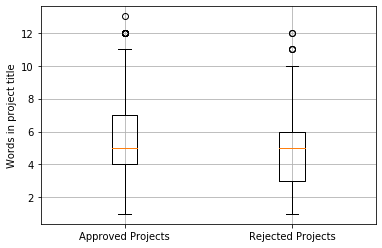

In [31]:
approved_word_count = project_Data[project_Data["project_is_approved"]==1]["project_title"].str.split().apply(len)
rejected_word_count  = project_Data[project_Data["project_is_approved"]==0]["project_title"].str.split().apply(len)

plt.boxplot([approved_word_count,rejected_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

In [34]:
project_Data["essay"] = project_Data["project_essay_1"].map(str) + project_Data["project_essay_2"].map(str) + project_Data["project_essay_3"].map(str) + project_Data["project_essay_4"].map(str)

word_count = project_Data["essay"].str.split().apply(len).value_counts()
word_count

189    1257
191    1208
188    1204
186    1186
192    1172
       ... 
504       1
501       1
502       1
119       1
511       1
Name: essay, Length: 375, dtype: int64

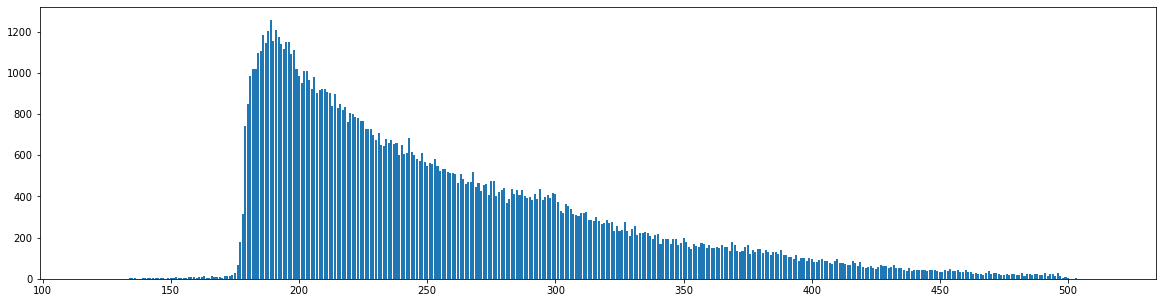

In [41]:
word_dict = dict(word_count)
sorted_word_dict = dict(sorted(word_dict.items(),key=lambda kv:kv[1]))
plt.figure(figsize=(20,5))
plt.bar(sorted_word_dict.keys(),sorted_word_dict.values())
plt.show()

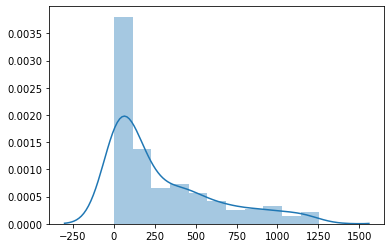

In [42]:
import seaborn as sns
sns.distplot(word_count.values)
plt.show()

In [45]:
project_Data["project_grade_category"].value_counts()

Grades PreK-2    44225
Grades 3-5       37137
Grades 6-8       16923
Grades 9-12      10963
Name: project_grade_category, dtype: int64

In [47]:
project_Data["project_grade_category"]=project_Data["project_grade_category"].str.replace(" ","")
project_Data["project_grade_category"]=project_Data["project_grade_category"].str.replace("-","_")
project_Data["project_grade_category"]=project_Data["project_grade_category"].str.lower()
project_Data["project_grade_category"].value_counts()

gradesprek_2    44225
grades3_5       37137
grades6_8       16923
grades9_12      10963
Name: project_grade_category, dtype: int64

In [48]:
project_Data["project_subject_categories"].value_counts()

Literacy & Language                           23655
Math & Science                                17072
Literacy & Language, Math & Science           14636
Health & Sports                               10177
Music & The Arts                               5180
Special Needs                                  4226
Literacy & Language, Special Needs             3961
Applied Learning                               3771
Math & Science, Literacy & Language            2289
Applied Learning, Literacy & Language          2191
History & Civics                               1851
Math & Science, Special Needs                  1840
Literacy & Language, Music & The Arts          1757
Math & Science, Music & The Arts               1642
Applied Learning, Special Needs                1467
History & Civics, Literacy & Language          1421
Health & Sports, Special Needs                 1391
Warmth, Care & Hunger                          1309
Math & Science, Applied Learning               1220
Applied Lear

In [50]:
project_Data["project_subject_categories"]=project_Data["project_subject_categories"].str.replace(" ","")
project_Data["project_subject_categories"]=project_Data["project_subject_categories"].str.replace(" The ","")
project_Data["project_subject_categories"]=project_Data["project_subject_categories"].str.replace("&","_")
project_Data["project_subject_categories"]=project_Data["project_subject_categories"].str.replace(",","_")
project_Data["project_subject_categories"]=project_Data["project_subject_categories"].str.lower()
project_Data["project_subject_categories"].value_counts()

literacy_language                       23655
math_science                            17072
literacy_language_math_science          14636
health_sports                           10177
music_thearts                            5180
specialneeds                             4226
literacy_language_specialneeds           3961
appliedlearning                          3771
math_science_literacy_language           2289
appliedlearning_literacy_language        2191
history_civics                           1851
math_science_specialneeds                1840
literacy_language_music_thearts          1757
math_science_music_thearts               1642
appliedlearning_specialneeds             1467
history_civics_literacy_language         1421
health_sports_specialneeds               1391
warmth_care_hunger                       1309
math_science_appliedlearning             1220
appliedlearning_math_science             1052
literacy_language_history_civics          809
health_sports_literacy_language   

In [52]:
project_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 18 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   Unnamed: 0                                    109248 non-null  int64 
 1   id                                            109248 non-null  object
 2   teacher_id                                    109248 non-null  object
 3   teacher_prefix                                109245 non-null  object
 4   school_state                                  109248 non-null  object
 5   project_submitted_datetime                    109248 non-null  object
 6   project_grade_category                        109248 non-null  object
 7   project_subject_categories                    109248 non-null  object
 8   project_title                                 109248 non-null  object
 9   project_essay_1                               109248 non-nu

In [53]:
project_Data["teacher_prefix"].isnull().sum()

3

In [55]:
project_Data["teacher_prefix"] = project_Data["teacher_prefix"].fillna("Mrs.")
project_Data["teacher_prefix"] = project_Data["teacher_prefix"].str.replace(".","")
project_Data["teacher_prefix"] = project_Data["teacher_prefix"].str.lower()


0

In [61]:
project_Data["clean_subcategories"] = project_Data["clean_subcategories"].str.replace(" ","_")
project_Data['clean_subcategories'].value_counts()

Literacy                                9486
LiteracyMathematics                     8325
Literature_WritingMathematics           5923
LiteracyLiterature_Writing              5571
Mathematics                             5379
                                        ... 
Literature_WritingNutritionEducation       1
ExtracurricularFinancialLiteracy           1
ESLEconomics                               1
FinancialLiteracyForeignLanguages          1
College_CareerPrepWarmthCare_Hunger        1
Name: clean_subcategories, Length: 401, dtype: int64

In [63]:
project_Data["school_state"].value_counts()

CA    15388
TX     7396
NY     7318
FL     6185
NC     5091
IL     4350
GA     3963
SC     3936
MI     3161
PA     3109
IN     2620
MO     2576
OH     2467
LA     2394
MA     2389
WA     2334
OK     2276
NJ     2237
AZ     2147
VA     2045
WI     1827
AL     1762
UT     1731
TN     1688
CT     1663
MD     1514
NV     1367
MS     1323
KY     1304
OR     1242
MN     1208
CO     1111
AR     1049
ID      693
IA      666
KS      634
NM      557
DC      516
HI      507
ME      505
WV      503
NH      348
AK      345
DE      343
NE      309
SD      300
RI      285
MT      245
ND      143
WY       98
VT       80
Name: school_state, dtype: int64

In [66]:
project_Data["school_state"] = project_Data["school_state"].str.lower()
project_Data["school_state"].value_counts()

ca    15388
tx     7396
ny     7318
fl     6185
nc     5091
il     4350
ga     3963
sc     3936
mi     3161
pa     3109
in     2620
mo     2576
oh     2467
la     2394
ma     2389
wa     2334
ok     2276
nj     2237
az     2147
va     2045
wi     1827
al     1762
ut     1731
tn     1688
ct     1663
md     1514
nv     1367
ms     1323
ky     1304
or     1242
mn     1208
co     1111
ar     1049
id      693
ia      666
ks      634
nm      557
dc      516
hi      507
me      505
wv      503
nh      348
ak      345
de      343
ne      309
sd      300
ri      285
mt      245
nd      143
wy       98
vt       80
Name: school_state, dtype: int64

In [67]:
import re

def decontracted(phrase):
    phrase = re.sub(r"won't","will not",phrase)
    phrase = re.sub(r"can\'t","can not",phrase)
    phrase = re.sub(r"n\'t","not",phrase)
    phrase = re.sub(r"\'s","is",phrase)
    phrase = re.sub(r"\'re","are",phrase)
    phrase = re.sub(r"\'d","would",phrase)
    phrase = re.sub(r"\'ll","will",phrase)
    phrase = re.sub(r"\'t","not",phrase)
    phrase = re.sub(r"\'ve","have",phrase)
    phrase = re.sub(r"\'m","am",phrase)
    return phrase

stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [68]:
project_Data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_subcategories', 'essay'],
      dtype='object')

In [69]:
project_Data["project_title"].head(5)

0     Educational Support for English Learners at Home
1                Wanted: Projector for Hungry Learners
2    Soccer Equipment for AWESOME Middle School Stu...
3                               Techie Kindergarteners
4                               Interactive Math Tools
Name: project_title, dtype: object

In [70]:
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    for sentence in tqdm(text_data):
        sent = decontracted(sentence)
        sent = sent.replace('\\r'," ")
        sent = sent.replace('\\n'," ")
        sent = sent.replace('\\"'," ")
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = " ".join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text    

In [71]:
preprocessed_titles = preprocess_text(project_Data["project_title"].values)

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:19<00:00, 5692.11it/s]


In [74]:
print("1,",preprocessed_titles[1])
preprocessed_titles[10]

1, wanted projector hungry learners


'reading changes lives'

In [76]:
preprocessed_essays = preprocess_text(project_Data["essay"].values)

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [03:35<00:00, 506.97it/s]


In [77]:
preprocessed_essays[1]

'students arrive school eager learn polite generous strive best know education succeed life help improve lives school focuses families low incomes tries give student education deserve not much students use materials given best projector need school crucial academic improvement students technology continues grow many resources internet teachers use growth students however school limited resources particularly technology without disadvantage one things could really help classrooms projector projector not crucial instruction also growth students projector show presentations documentaries photos historical land sites math problems much projector make teaching learning easier also targeting different types learners classrooms auditory visual kinesthetic etc nannan'

In [79]:
resource_Data=pd.read_csv("C:\\Users\\ACER\\Desktop\\machine learning\\Assignment\\NB\\resources.csv")
resource_Data.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


In [83]:
price_data = pd.DataFrame(resource_Data.groupby(id).agg({"price":"sum","quantity":"sum"})).reset_index()
price_data

,index,price,quantity
0,2864821914320,13.59,1
1,2864822747184,99.99,1
2,2864822747216,49.99,1
3,2864822747248,49.99,2
4,2864822747280,49.99,1
...,...,...,...
1541267,140725922611440,329.99,3
1541268,140725922611472,159.99,4
1541269,140725922611504,159.99,2
1541270,140725922611536,99.95,1


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import pandas as pd
data = pd.read_csv("C:\\Users\\ACER\\Desktop\\machine learning\\Assignment\\NB\\preprocessed_data.csv",nrows = 5000)
y = data["project_is_approved"].values
x = data.drop("project_is_approved",axis = 1)
x.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,stratify = y)
x_train,x_cv,y_train,y_cv = train_test_split(x_train,y_train,test_size = 0.33,stratify = y_train)

In [36]:
print(x_train.shape,y_train.shape)
print(x_cv.shape,y_cv.shape)
print(x_test.shape,y_test.shape)

print("="*50)

vectorizer = CountVectorizer(min_df = 10, max_features = 5000, ngram_range = (1,4))
vectorizer.fit(x_train["essay"].values) #fit only happens to the train data.

#use fitted CountVectorizer to tranform the text into vector
x_train_essay_ohe = vectorizer.transform(x_train["essay"].values)
x_cv_essay_ohe  = vectorizer.transform(x_cv["essay"].values)
x_test_essay_ohe = vectorizer.transform(x_test["essay"].values)

print("after vectorization")
print(x_train_essay_ohe.shape,y_train.shape)
print(x_cv_essay_ohe.shape,y_cv.shape)
print(x_test_essay_ohe.shape,y_test.shape)

print("="*100)



(2244, 8) (2244,)
(1106, 8) (1106,)
(1650, 8) (1650,)
after vectorization
(2244, 5000) (2244,)
(1106, 5000) (1106,)
(1650, 5000) (1650,)


In [37]:
#encoding categorical features 
vectorizer = CountVectorizer()
vectorizer.fit(x_train["school_state"].values)

x_train_state_ohe = vectorizer.transform(x_train["school_state"].values)
x_cv_state_ohe = vectorizer.transform(x_cv["school_state"].values)
x_test_state_ohe = vectorizer.transform(x_test["school_state"].values)

print(x_train_state_ohe.shape)
print(x_cv_state_ohe.shape)
print(x_test_state_ohe.shape)
print(vectorizer.get_feature_names())

(2244, 51)
(1106, 51)
(1650, 51)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [38]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train["teacher_prefix"].values)

x_train_teacher_ohe = vectorizer.transform(x_train["teacher_prefix"].values)
x_cv_teacher_ohe = vectorizer.transform(x_cv["teacher_prefix"].values)
x_test_teacher_ohe = vectorizer.transform(x_test["teacher_prefix"].values)

print(x_train_teacher_ohe.shape)
print(x_cv_teacher_ohe.shape)
print(x_test_teacher_ohe.shape)
print(vectorizer.get_feature_names())


(2244, 4)
(1106, 4)
(1650, 4)
['mr', 'mrs', 'ms', 'teacher']


In [39]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train["project_grade_category"].values)

x_train_grade_ohe = vectorizer.transform(x_train["project_grade_category"].values)
x_cv_grade_ohe = vectorizer.transform(x_cv["project_grade_category"].values)
x_test_grade_ohe = vectorizer.transform(x_test["project_grade_category"].values)

print(x_train_grade_ohe.shape)
print(x_cv_grade_ohe.shape)
print(x_test_grade_ohe.shape)
print(vectorizer.get_feature_names())

(2244, 4)
(1106, 4)
(1650, 4)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [40]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(x_train["price"].values.reshape(-1,1))
x_train_price_norm = normalizer.transform(x_train["price"].values.reshape(-1,1))
x_cv_price_norm = normalizer.transform(x_cv["price"].values.reshape(-1,1))
x_test_price_norm = normalizer.transform(x_test["price"].values.reshape(-1,1))

print("after vectorisation")
print(x_train_price_norm.shape)
print(x_cv_price_norm.shape)
print(x_test_price_norm.shape)

after vectorisation
(2244, 1)
(1106, 1)
(1650, 1)


In [41]:
from scipy.sparse import hstack
x_tr = hstack((x_train_essay_ohe,x_train_state_ohe,x_train_teacher_ohe,x_train_grade_ohe,x_train_price_norm)).tocsr()
x_cv = hstack((x_cv_essay_ohe,x_cv_state_ohe,x_cv_teacher_ohe,x_cv_grade_ohe,x_cv_price_norm)).tocsr()
x_te = hstack((x_test_essay_ohe,x_test_state_ohe,x_test_teacher_ohe,x_test_grade_ohe,x_test_price_norm)).tocsr()

print("Final data matrix")
print(x_tr.shape)
print(x_cv.shape)
print(x_te.shape)

Final data matrix
(2244, 5060)
(1106, 5060)
(1650, 5060)


In [51]:
from tqdm import tqdm
def batch_predict(clf,data):
    #roc_auc_score(y_true,y_pred) the 2nd parameter should be probability estimates of positive class
    y_data_pred = []
    tr_loop = data.shape[0]-data.shape[0]%1000
    # if you have 2244 datapoints then tr_loop = 2244-2244%1000 = 2000
    for i in range(0,tr_loop,1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # for remaining 244 datapoints
    if data.shape[0]%1000!=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred
        

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:06<00:00,  1.38s/it]


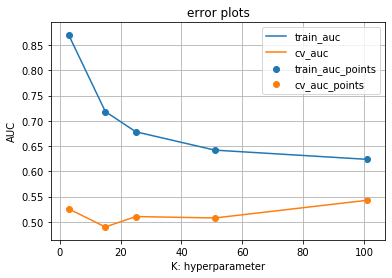

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt 

train_auc = []
cv_auc = []
k = [3,15,25,51,101]

for i in tqdm(k):
    neigh = KNeighborsClassifier(n_neighbors = i, n_jobs= -1)
    neigh.fit(x_tr,y_train)
    y_train_pred = batch_predict(neigh,x_tr)
    y_cv_pred = batch_predict(neigh,x_cv)
    #roc_auc_score(y_true,y_score) the 2nd parameter should be probabality of positive class
    #not the predicted output
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv,y_cv_pred))
    
plt.plot(k,train_auc,label="train_auc")
plt.plot(k,cv_auc,label ="cv_auc")

plt.scatter(k,train_auc,label ="train_auc_points")
plt.scatter(k,cv_auc,label= "cv_auc_points")

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("error plots")
plt.grid()
plt.show()


In [67]:
#choose a best_k in such a way that the cv_score should be high and the gap between train and cv error should be less.
best_k = 100 

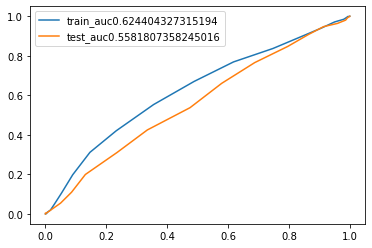

In [70]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
neigh = KNeighborsClassifier(n_neighbors = best_k, n_jobs = -1)
neigh.fit(x_tr,y_train)
y_train_pred = batch_predict(neigh,x_tr)
y_test_pred = batch_predict(neigh,x_te)

train_fpr,train_tpr,train_threshold = roc_curve(y_train,y_train_pred)
test_fpr,test_tpr,test_threshold = roc_curve(y_test,y_test_pred)

plt.plot(train_fpr,train_tpr, label = "train_auc"+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label = "test_auc"+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.show()

In [93]:
from sklearn.metrics import confusion_matrix
y_predicted = neigh.predict(x_te)
confusion_matrix(y_test,y_predicted)

array([[   0,  221],
       [   0, 1429]], dtype=int64)